# Проект: Интернет-магазин «В один клик» 

## Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

## Задача проекта: 
разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Путь решения задачи:
Шаг 1. Загрузка данных и изучение общей информации
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных. Отбор клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период
Шаг 4. Объединение таблиц market_file.csv, market_money.csv, market_time.csv
Шаг 5. Корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования
Шаг 6. Использование пайплайнов. Обучение четырех моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()
Шаг 7. Анализ важности признаков
Шаг 8. Сегментация покупателей
Шаг 9. Общий вывод. Указание лучшей модели

## Описание данных
Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.
market_file.csv
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
id — номер покупателя в корпоративной базе данных.
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
Выручка — сумма выручки за период.
market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.
money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
id — номер покупателя в корпоративной базе данных.
Прибыль — значение прибыли.

## Загрузка необходимых библиотек

In [1]:
#установка библиотек
!pip install shap -q
!pip install scikit-learn==1.1.3 -q
import shap 
import pandas as pd
import numpy as np 
from scipy import stats as st 
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore")



RANDOM_STATE = 42
TEST_SIZE = 0.25

## Шаг 1. Загрузка датасетов и изучение общей информации о них

In [3]:
#загрузим и прочитаем датайрейм market_file
try:
    market_file = pd.read_csv('C:/Users/user/Downloads/market_file.csv')
except:
    market_file = pd.read_csv('/datasets/market_file.csv')

In [4]:
#изучим общую информацию о датафрейме
market_file.info()
market_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Явных пропусков нет. Названия столбцов необходимо переименовать согласно правила хорошего стиля.

In [6]:
#загрузим и прочитаем датайрейм market_money.csv
try:
    market_money = pd.read_csv('C:/Users/user/Downloads/market_money.csv')
except:
    market_money = pd.read_csv('/datasets/market_money.csv')

In [7]:
market_money.info()
market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Явных пропусков нет. Необходимо переименовать столбцы к нижнему регистру. Минимальное и максимальные значения выглядят подозрительными, вернемся к этому позже

In [9]:
#загрузим и прочитаем датайрейм market_time.csv
try:
    market_time = pd.read_csv('C:/Users/user/Downloads/market_time.csv')
except:
    market_time = pd.read_csv('/datasets/market_time.csv')

In [10]:
market_time.info()
market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Явных пропусков нет

In [12]:
#загрузим и прочитаем датайрейм money.csv
try:
    money = pd.read_csv('C:/Users/user/Downloads/money.csv', sep=';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [13]:
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [14]:
money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Явных пропусков нет

### Вывод:
все датафреймы загрузили, в файле money.csv разделителем была точка с запятой
    В таблицах отсутствуют пропуски. Все типы данных соответствуют нужным

## Шаг 2. Предобработка данных

Переименование столбцов

Заменим пробелы на нижнее подчеркивание и приведем наименования столбцов к нижнему регистру. Для упрощения кода, сделаем преобразование функцией

In [15]:
def columns_remove(data):
    data.columns = data.columns.str.replace(' ', '_').str.lower()

In [16]:
columns_remove(market_file)
columns_remove(market_money)
columns_remove(market_time)
columns_remove(money)

In [17]:
#проверим
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [18]:
money.columns

Index(['id', 'прибыль'], dtype='object')

In [19]:
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [20]:
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [21]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Переименовали столбцы, приведя их к нижнему регистру и избавились от пробелов, заменив их на нижнее подчеркивание

Поиск и удаление дубликатов

In [22]:
market_file.duplicated().sum()

0

Явных дубликатов нет

In [23]:
market_money.duplicated().sum()

0

Явных дубликатов нет

In [24]:
market_time.duplicated().sum()

0

Явных дубликавто нет

In [25]:
money.duplicated().sum()

0

Явных дубликатов нет

### Выводы по шагу 2:
Переимновали столбцы согласно правилам хорошего стиля, избавились от пробелов, заменив их на нижнее подчеркивание и привели все столбцы к нижнему регистру
Проверили все датафреймы на явные дубликаты, их не оказалось

## Шаг 3. Исследовательский анализ данных

Для упрощения кода создадим функцию для построения гистограммы распределения и диаграммы размаха

In [26]:
def hist_box(data, column):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'"{column}"')
    plt.ylabel('частота')
    plt.title(f'гистограмма для "{column}"')
    sns.histplot(data[column], color='Blue')
    plt.subplot(1, 2, 2)
    plt.xlabel(f'{column}')
    plt.title(f'диаграмма размаха для "{column}"')
    sns.boxplot(x=data[column], color='Pink')

Поработаем с первым датафреймом market_file

In [27]:
#создадим списки количественных столбцов датасета market_file
num_col_market_file = ['маркет_актив_6_мес', 
                  'маркет_актив_тек_мес', 
                  'длительность', 
                  'акционные_покупки',
                  'средний_просмотр_категорий_за_визит',
                  'неоплаченные_продукты_штук_квартал', 
                  'ошибка_сервиса', 
                  'страниц_за_визит']

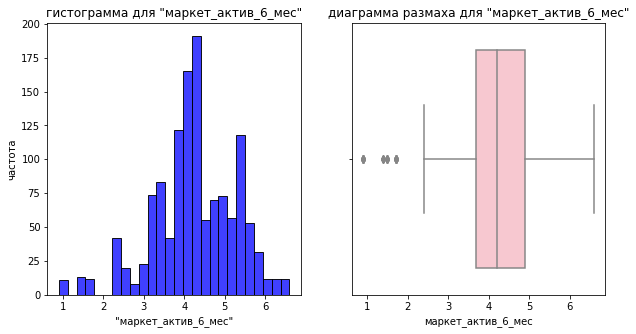

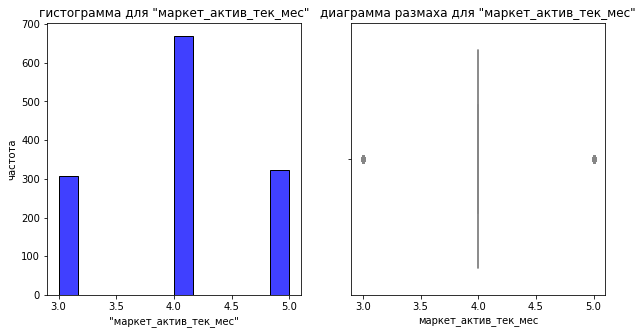

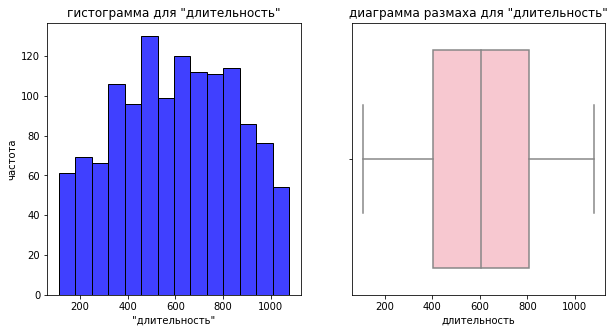

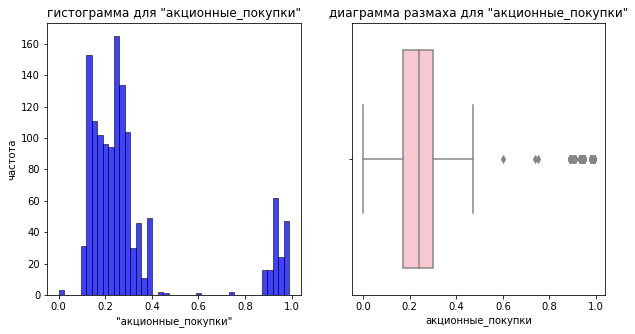

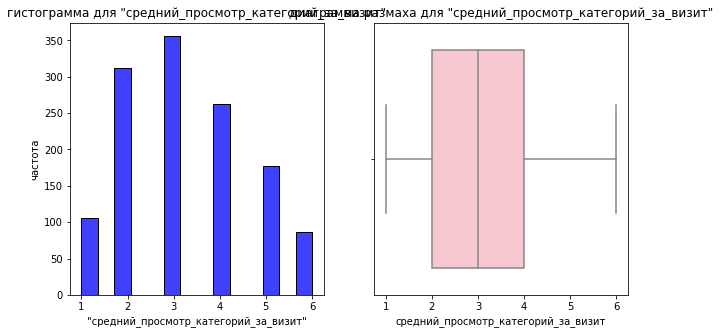

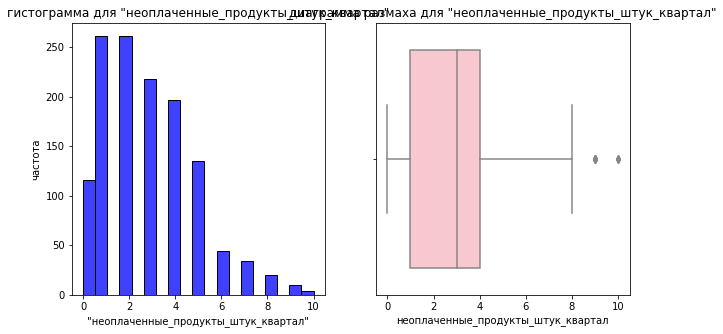

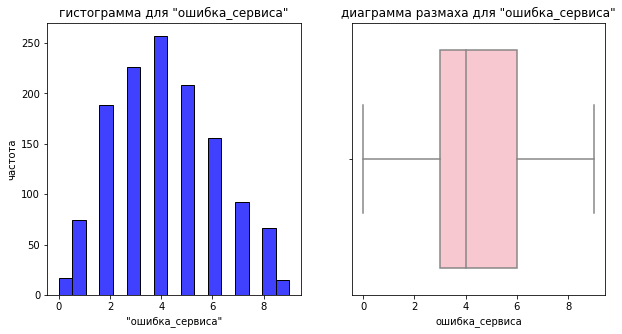

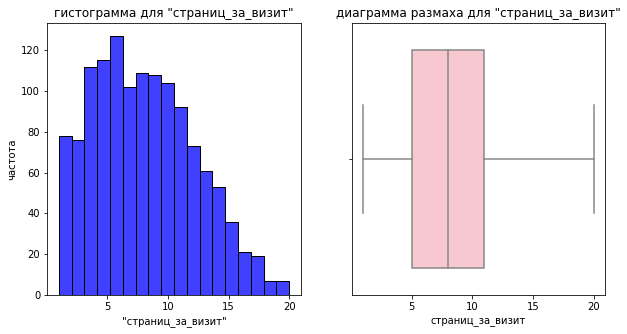

In [28]:
#построим распределения количественных признаков датасета market_file
for name in num_col_market_file:
    hist_box(market_file, name)

### Выводы по каждому признаку первого датафрейма market_file
1. признак "маркет_актив_6_мес", в целом, рапрелелен нормально
2. признак 'маркет_актив_тек_мес' включает в себя только 3 значения, его можно сделать категориальным по 3 признакам.
3. признак 'длительность' распределен нормально
4. признак 'акционные_покупки'имеет два ярко выраженных пика. Существует немалая доля покупателей, которая берет товары только по акции
5. признак 'средний_просмотр_категорий_за_визит'имеет нормальное распределение
6. признак 'неоплаченные_продукты_штук_квартал' имеет распределение влево
7. признак 'ошибка_сервиса' распределен нормально
8. признак 'страниц_за_визит'имеет нормальное распределение с свдигом влево

Далее поработаем со вторым датафреймом market_money

In [29]:
#создадим список количественных признаков market_money
num_col_market_money = ['выручка'] 

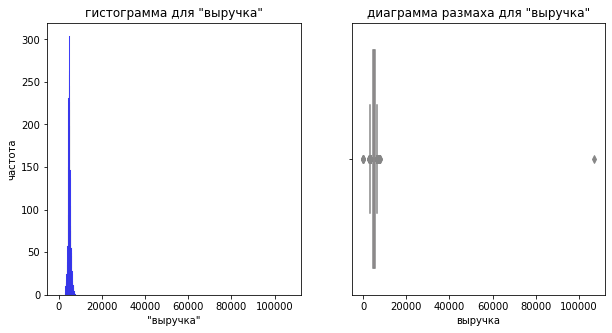

In [30]:
#построим гистограмму распределения и диаграмму размаха количественных признаков датасета market_money
for name in num_col_market_money:
    hist_box(market_money, name)

Датасет явно содержит "выброс"

In [31]:
market_money.query('выручка > 15000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Наблюдаем слишком высокое значение выручки, это явно выброс. Для дальнейшей работы необходимо от него избавиться

In [32]:
#удаление аномально большого значения выручки
market_money = market_money.query('выручка < 15000')

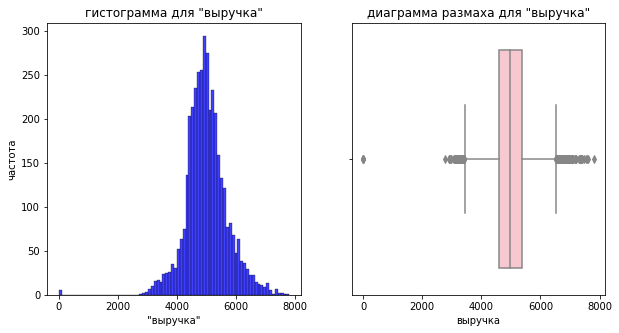

In [33]:
#построим гистограмму распределения и диаграмму размаха количественных признаков датасета market_money без выброса
for name in num_col_market_money:
    hist_box(market_money, name)

Распределение носит нормальный характер, однако наблюдаются ещё аномальные значения в виде 0, от них тоже придется избавиться

In [34]:
market_money = market_money.query('0 < выручка < 15000')

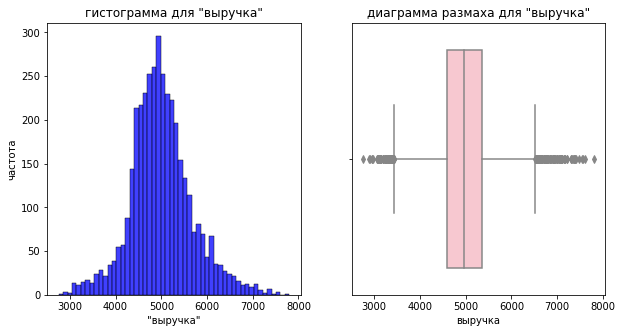

In [35]:
for name in num_col_market_money:
    hist_box(market_money, name)

Далее поработаем со третьим датафреймом market_time

In [36]:
#создадим список количественных признаков датафрейма market_time
num_col_market_time = ['минут'] 

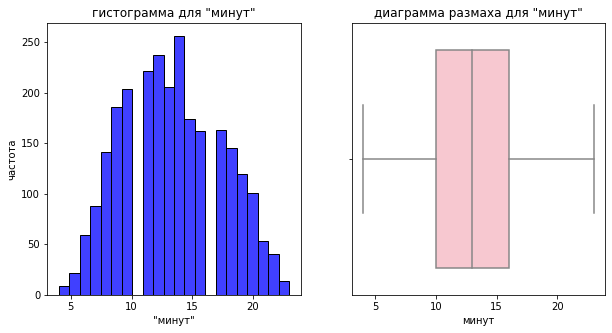

In [37]:
for name in num_col_market_time:
    hist_box(market_time, name)

Количественный признак "минут" имеет нормальное распределение

Далее поработаем с четвертым датафреймом money

In [38]:
#создадим списки категориальных признаков для датафрейма money
num_col_money = ['прибыль'] 

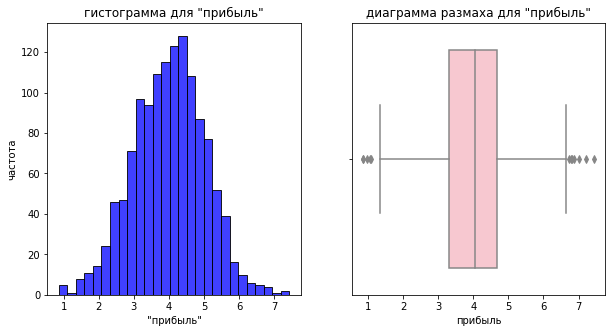

In [39]:
for name in num_col_money:
    hist_box(money, name)

Признак "прибыль" имеет нормальное распределение

### Вывод:
изучили все распределения всех датасетов по количественным признакам

Поработаем теперь с категориальными признаками каждого датасета

Для упрощения кода, создадим функцию для построения диаграмм для категориальных признаков каждого датасета

Поработаем с категориальными признаками первого датасета market_file

Создадим функцию для построения распределения категориальных признаков

In [40]:
def categoral_unique(df, col):
    display(df[col].unique())
    
    plt.figure(figsize=(10,5))
    plot = sns.countplot(y=col, data=df)
    plot.set_title(f'Рапределение по "{col}"', fontsize=15)
    plot.set_xlabel('Количество', fontsize=15)

array(['Снизилась', 'Прежний уровень'], dtype=object)

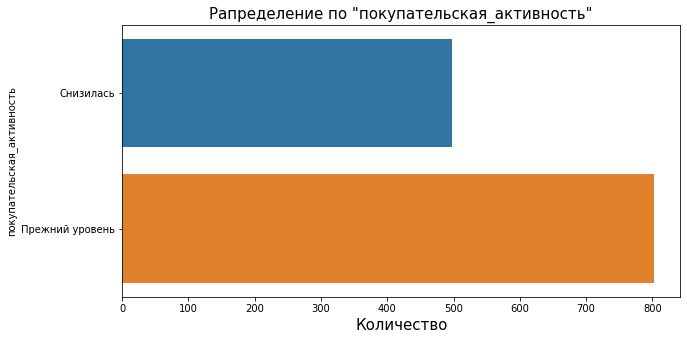

In [41]:
categoral_unique(market_file, 'покупательская_активность')

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

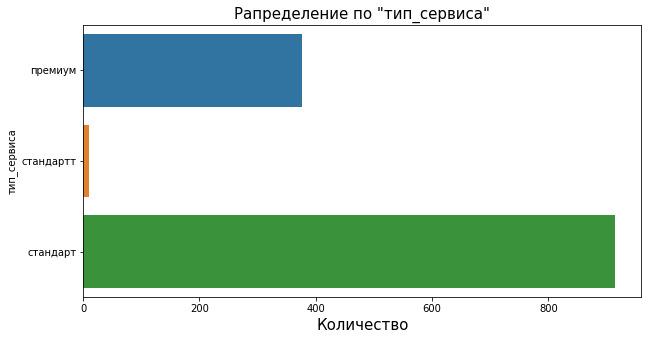

In [42]:
categoral_unique(market_file, 'тип_сервиса')

Обнаруили ошибку "стандартт", необходимо от нее избавиться

In [43]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

array(['премиум', 'стандарт'], dtype=object)

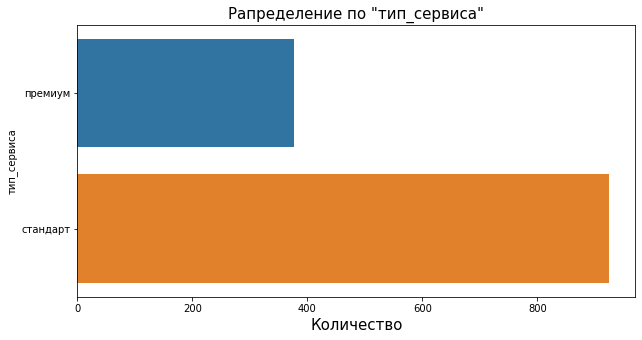

In [44]:
categoral_unique(market_file, 'тип_сервиса')

Получили распределение без ошибки

array(['да', 'нет'], dtype=object)

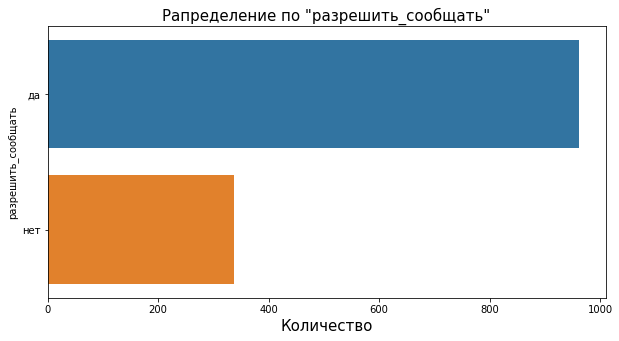

In [45]:
categoral_unique(market_file, 'разрешить_сообщать')

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

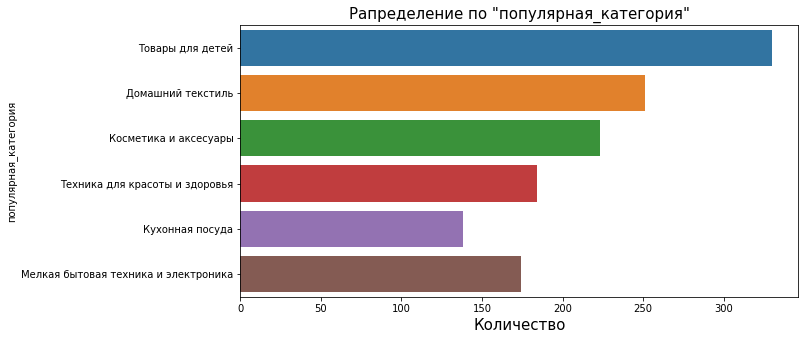

In [46]:
categoral_unique(market_file, 'популярная_категория')

Для наглядности сделаем все тоже самое, но в виде круговых диаграмм с указанием процентов

Для этого создадим функцию для построения круговых диаграмм у категориальных признаков

In [47]:
def pie_graph(dataset, column, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)[name].count(),
            startangle=90,
            labeldistance=1.1,
            autopct='%1.1f%%',
            labels=dataset.groupby(column)[name].count().index)

In [48]:
#создадим список категориальных признаков датасета market_file
cat_col_market_file = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

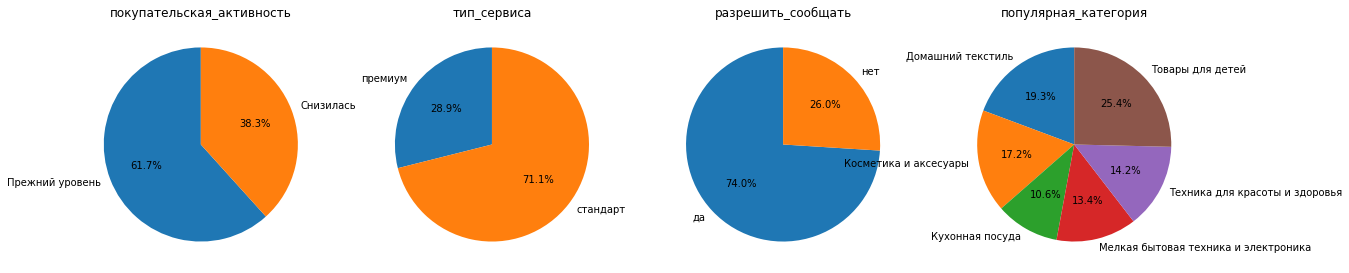

In [49]:
i = 1
plt.figure(figsize=(20,5))
for name in cat_col_market_file:
    pie_graph(market_file, name, 'id', len(cat_col_market_file), i)
    i += 1

### Выводы:
1. построили гистограммы распределения категориальных признаков датасета market_file
2. нашли опечатку "стандартт", избавились от нее
3. для наглядности построили круговые диаграммы для категориальных признаков с указанием процентного соотношения.

Далее поработаем с датафреймом market_money

Поскольку нагляднее себя показала круговая диаграмма, будем работать с ней

In [50]:
#создадим список категориальных признаков датасета market_money
cat_col_market_money = ['период']

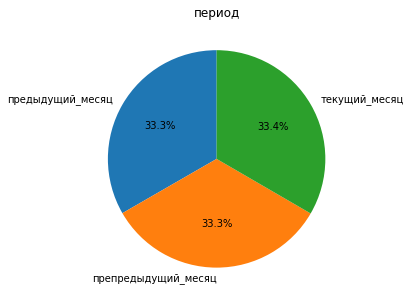

In [51]:
i = 1
plt.figure(figsize=(20,5))
for name in cat_col_market_money:
    pie_graph(market_money, name, 'id', len(cat_col_market_money), i)
    i += 1

Данный признак распеделен равномерно.

Далее поработаем с датафреймом market_time

In [52]:
#создадим список категориальных признаков датафрейма market_time
cat_col_market_time = ['период']

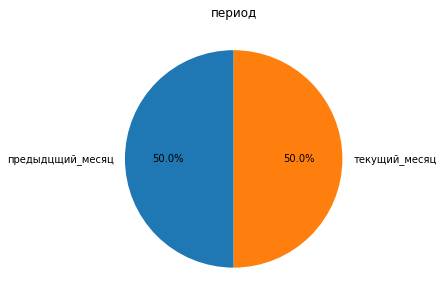

In [53]:
#построим круговую диаграмму распределения кат признаков
i = 1
plt.figure(figsize=(20,5))
for name in cat_col_market_time:
    pie_graph(market_time, name, 'id',len(cat_col_market_time), i)
    i += 1

Данный признак также распределен равномерно

Видим опечатку, от нее надо избавиться

In [54]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

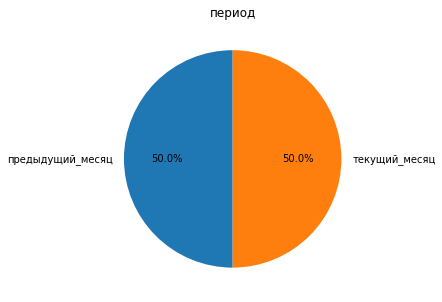

In [55]:
#проверим
i = 1
plt.figure(figsize=(20,5))
for name in cat_col_market_time:
    pie_graph(market_time, name, 'id',len(cat_col_market_time), i)
    i += 1

По условиям задачи, необходимо выбрать покупателей с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

Для этого нам нужно отобрать из датафрейма market_money только тех пользователей, к которых есть записи по выручке за все три периода: 'препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'

In [56]:
agg_dict = {'период': ['count']}
grouped = market_money.groupby('id').agg(agg_dict)
grouped.columns = ['count']

grouped = grouped[grouped['count'] == 3]
market_file = market_file[market_file['id'].isin(grouped.index)]
len(market_file)

1296

### Выводы:
1. Провели исследовательский анализ данных для каждой таблицы.
2. Отбросили явно аномальные значения
3. Исправили опечатки в данных
4. Оставили пользователей, которые совершали покупки последние 3 календарных месяца

## Шаг 4. Объединение таблиц

Объединим таблицы market_file, market_money, market_time в одну, по условиям задачи данные о прибыли из файла money.csv при моделировании нам не понадобятся

In [57]:
#добавление новых столбцов 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped['id'] = market_money_grouped.index

In [58]:
#добавление новых столбцов 'минут_предыдущий_месяц', 'минут_текущий_месяц'
market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped['id'] = market_time_grouped.index

In [59]:
#объединение всех столбцов в один
market_result = market_file.join(market_money_grouped, on='id', lsuffix="_left", rsuffix="_выручка")
market_result = market_result.rename(columns={'id_left':'id'})
market_result = market_result.join(market_time_grouped, on='id', lsuffix="_left", rsuffix="_минут")
market_result = market_result.rename(columns={'id_left':'id'})
market_result = market_result.drop(['id_выручка', 'id_минут'], axis=1)
market_result.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


### Вывод:
объединили таблицы market_file, market_money, market_time в одну

## Шаг 5. Корреляционный анализ

Поскольку все признаки распределены не нормально, будем испольщовать корреляцию Phik

In [60]:
!pip install scikit-learn==1.1.3
!pip install shap -q
!pip -q install phik

In [61]:
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


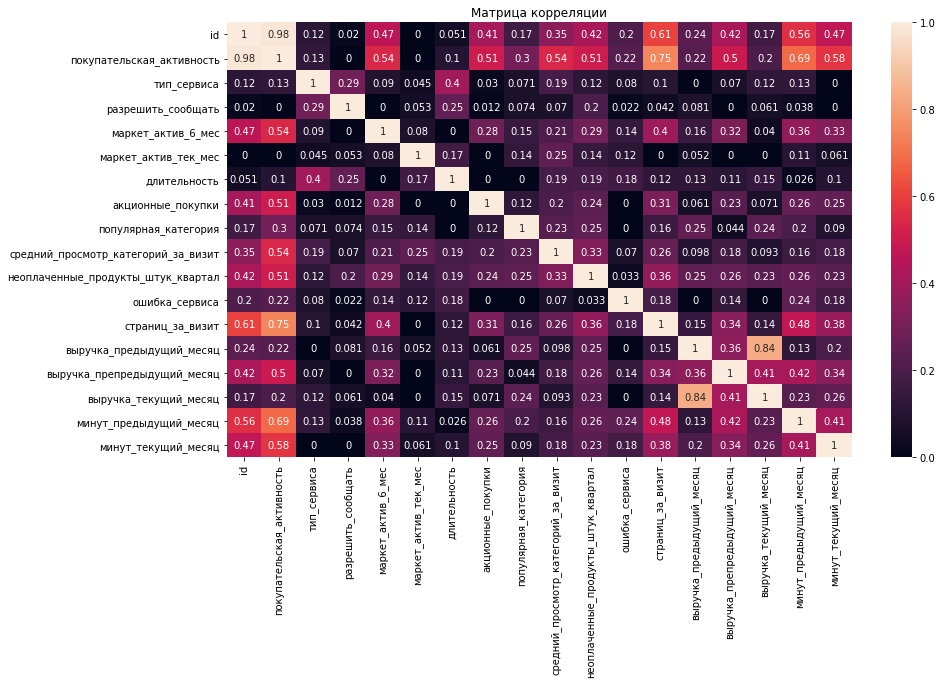

In [62]:
corr_matrix = market_result.phik_matrix()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Матрица корреляции')
plt.show()

Наиболее сильную корреляцию наблюдаем у признаков выручка_текущий_месяц и выручка_предыдущий_месяц

Чтобы избавиться от мультиколлинеарности, оюъединим два этих столбца и добавим их в новых столбец

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_пред_и_тек_месяц']


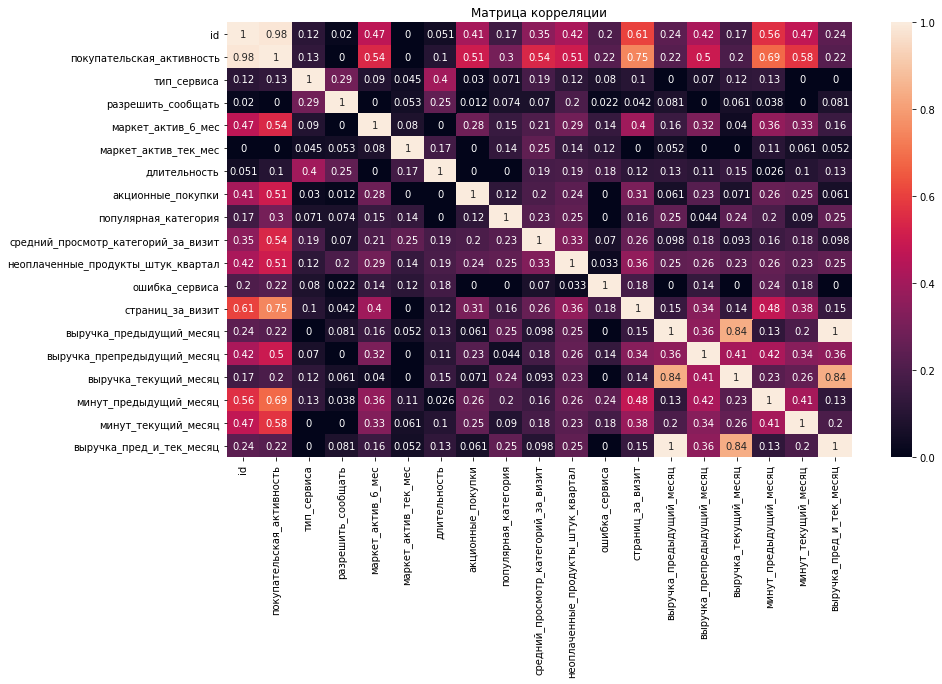

In [63]:
market_result['выручка_пред_и_тек_месяц'] = market_result['выручка_предыдущий_месяц'] 
+ market_result['выручка_текущий_месяц']
corr_matrix = market_result.phik_matrix()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Матрица корреляции')
plt.show()

### Выводы: 
1. провели корреляционный анализ
2. наблюдалась сильная корреляция между признаками выручка_текущий_месяц и выручка_предыдущий_месяц (0.83)
2. наблюдалась мультиколлинеарность у признаков выручка_текущий_месяц и выручка_предыдущий_месяц, избавились от нее, объединив эти две таблицы в одну

## Шаг 6. Использование пайплайнов

Подготовим данные

In [64]:
#проверим уникальные значени столбца покупательская активносит
market_result['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [65]:
market_result.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,5216.0
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,5457.5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,6158.0
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,5807.5
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,4738.5


Приравняем значения столбца покупательская актвиность Снизилась = 1, Прежний уровень = 0

In [66]:
market_result['покупательская_активность'] = market_result['покупательская_активность']\
.apply( lambda x: 1 if x=='Снизилась' else 0 )
market_result['покупательская_активность'] = market_result['покупательская_активность'].astype(int)  

In [67]:
market_result = market_result.set_index('id')

In [68]:
market_result.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц
id,,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,5216.0
215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,5457.5
215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,6158.0
215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,5807.5
215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,4738.5


столбец аукционные_покупки преобразуем в категориальный признак. Значение >= 0,5 сделаем "часто берут по акции", в другом случае "редко берут по акции"

In [69]:
market_result['акционные_покупки_кат'] = market_result['акционные_покупки']\
.apply( lambda x: 'часто_берут_по_акции' if x>= 0.5 else 'редко_берут_по_акции' )

In [70]:
#удалим старый столбец акционные покупки
market_result = market_result.drop(['акционные_покупки'], axis=1)

In [71]:
#проверим
market_result.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц,акционные_покупки_кат
id,,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,5216.0,часто_берут_по_акции
215350,1,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,5457.5,редко_берут_по_акции
215351,1,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,6158.0,часто_берут_по_акции
215352,1,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,5807.5,часто_берут_по_акции
215353,1,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,4738.5,редко_берут_по_акции


In [72]:
X = market_result.drop(['покупательская_активность'], axis=1)
y = market_result['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [73]:
X_train.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц,акционные_покупки_кат
id,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,5170.5,редко_берут_по_акции
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,6400.0,редко_берут_по_акции
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,4113.0,редко_берут_по_акции
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,4930.0,часто_берут_по_акции
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,3716.0,редко_берут_по_акции


In [74]:
#создадим списки категориальных и количественных признаков
ohe_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
ord_columns = ['акционные_покупки_кат']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
               'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц',
               'выручка_пред_и_тек_месяц']

In [75]:
# Pipeline для кодирования категориальных признаков
ohe_pipe = Pipeline([
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))])

In [76]:
ord_pipe = Pipeline([
        ('simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord',
            OrdinalEncoder(categories=[
                                      ['Редко покупает по акции','Часто покупает по акции']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)),
        ('simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

In [77]:
# Pipeline для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)], 
    remainder='passthrough')

In [78]:
# Итоговый Pipeline: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

In [79]:
#Параметры для передачи GridSearchCV для поиска оптимальной модели 
#с разными Scaler и Encoder
param_grid = [
    # для модели DecisionTreeClassifier()
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 7),
     'models__max_features': range(2,7),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    
    # для модели KNeighborsClassifier() 
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2,5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    # для модели LogisticRegression()
    {'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1')],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    # для модели SVC()
    {'models': [SVC(probability= True, random_state=RANDOM_STATE, kernel='poly')],
     'models__degree': range(2, 3),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

In [80]:
#поиск оптимальной модели без перебора гиперпараметров
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)

Для кокнретно этой задачи была выбрана ROC-AUC метрика для оценки модели классификации поскольку она отображает истинную и постоянную способность модели к прогнозированию, учитывает не только результаты классификации, но и вероятность предсказания всех классов. Данная метрика оценивает эффективность модели при различных пороговых значениях и является комплексной метрикой для оценки того, насколько хорошо разделяются случаи в разных группах

In [81]:
#обучение модели на тренировочной выборке 
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                                                                'разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simple...
                                        {'models': [LogisticRegression(C=1,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [82]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imput

Проверим работу модели на тестовой выборке

In [83]:
y_test_pred = randomized_search.predict(X_test)

In [84]:
y_test_proba = randomized_search.predict_proba(X_test)

In [85]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba[:,1])}')

Метрика ROC-AUC на тестовой выборке: 0.9127937548032198


In [86]:
from sklearn.metrics import roc_auc_score, f1_score

In [87]:
print(f'Метрика F1-score на тестовой выборке: {f1_score(y_test, y_test_pred, average="binary")}')

Метрика F1-score на тестовой выборке: 0.8333333333333334


### Выводы:
1. Выявили лучшую модель. Лучшие результаты показала LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'
2. Метрика лучшей модели на тренировочной выборке: 0.89
2. Метрика ROC-AUC на тестовой выборке: 0.91
3. Метрика F1-score на тестовой выборке: 0.86
4. Модель показала себя очень хорошо, значения высокие

## Шаг 7. Анализ важности признаков

In [88]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)

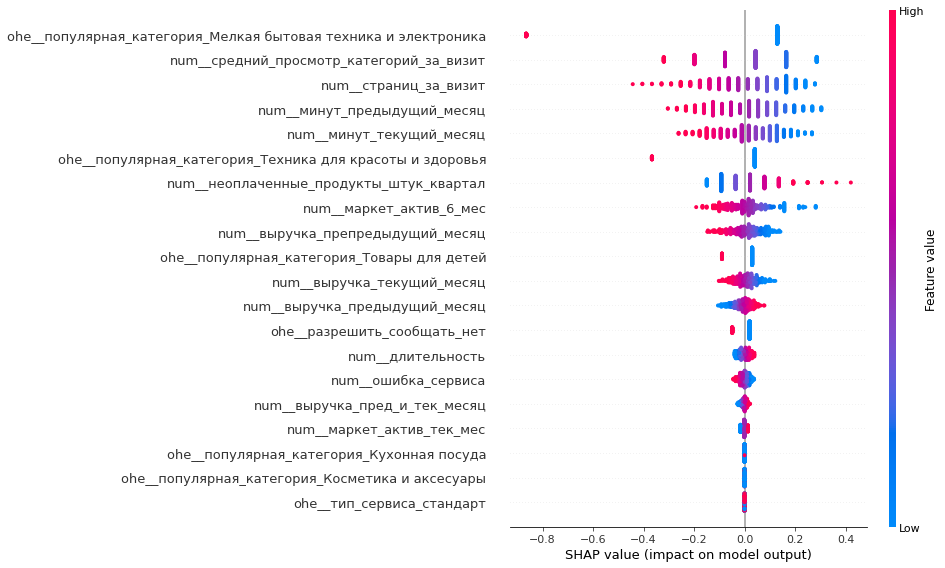

In [89]:
shap.plots.beeswarm(shap_values, max_display=30)

### Выводы:
Самые важные признаки для модели это мелкая бытовая техника и электроника, средний просмотр категорий за визит, страниц за визит, минут предыдущий месяц, неоплаченные продукты штук квартал. По этим признаком можно разбить покупателей по сегментам.
Малозначимыми признаками для модели можно назвать выручку пред и тек месяц (которые мы объединили ранее), тип сервиса, разрешить сообщать.
При моделировании и принятии бизнес-решений, необходимо сделать так, чтобы пользователь больше времени проводил на маркетплейсе.
Странным выглядит только присутствие на первом месте мелкой бытовой техники и электроники

## Шаг 8. Сегментация покупателей

Для дальнейшего исследования нам нобходимо выбрать сегмент пользователей и сделать анализ выбранного сегмента для составления рекомендаций заказчику, для увеличения прибыли выбранного сегмента. Для начала построим диаграммы рассеяния Прибыли и Вероятности снижения активности пользователя, которую определила сама модель. А уже потом будем выделять определенный сегмент покупателей

In [90]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [91]:
X_test.head(5)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц,акционные_покупки_кат
id,,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,3973.0,редко_берут_по_акции
215654,премиум,нет,1.4,4,684,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,3548.0,часто_берут_по_акции
216307,премиум,да,3.3,4,488,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,5444.0,редко_берут_по_акции
215501,премиум,да,3.5,3,1057,Домашний текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9,6604.0,редко_берут_по_акции
215934,стандарт,нет,5.5,4,147,Мелкая бытовая техника и электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18,5090.0,часто_берут_по_акции


В таблице нужны данные о прибыли, содержащиеся в money.csv

In [92]:
X_test_full = X_test.copy()
X_train_full = X_train.copy()
X_test_full['вероятность_снижения'] = y_test_proba
X_train_full['вероятность_снижения'] = y_train_proba
df_full = pd.concat([X_train_full, X_test_full])

money = money.set_index('id')
df_full = df_full.join(money)

In [93]:
df_full.head(5)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,выручка_пред_и_тек_месяц,акционные_покупки_кат,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,5170.5,редко_берут_по_акции,0.070741,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,6400.0,редко_берут_по_акции,0.824311,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,4113.0,редко_берут_по_акции,0.095859,4.37
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,4930.0,часто_берут_по_акции,0.378413,5.58
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,3716.0,редко_берут_по_акции,0.783707,4.87


Построим график зависимости веростности снижения активности от прибыли

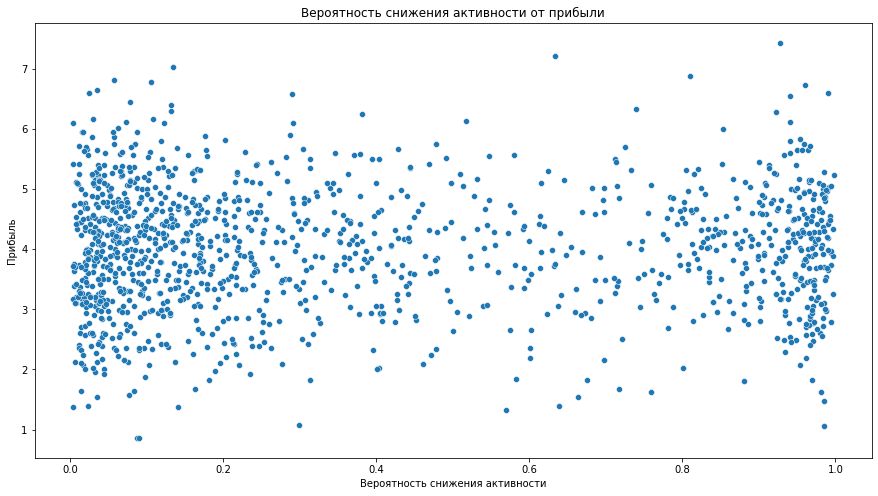

In [94]:
profit = plt.figure(figsize=(15,8))
sns.scatterplot(data=df_full, y='прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Вероятность снижения активности от прибыли')
plt.show()

Из графика определить сегмент не получится. Не наблюдается сильная зависимость вероятности снижения активности от прибыли

Чтобы определить сегмент, попробуем построить такие же диаграммы для категориальных признаков.

In [95]:
def build_scatterplots(cat_columns):
    for cat_col in cat_columns:
        fig = plt.figure(figsize=(15,8))
        sns.scatterplot(data=df_full, y='прибыль', x='вероятность_снижения', hue=cat_col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('зависимость вероятности снижения активности от выручки')
        plt.show()

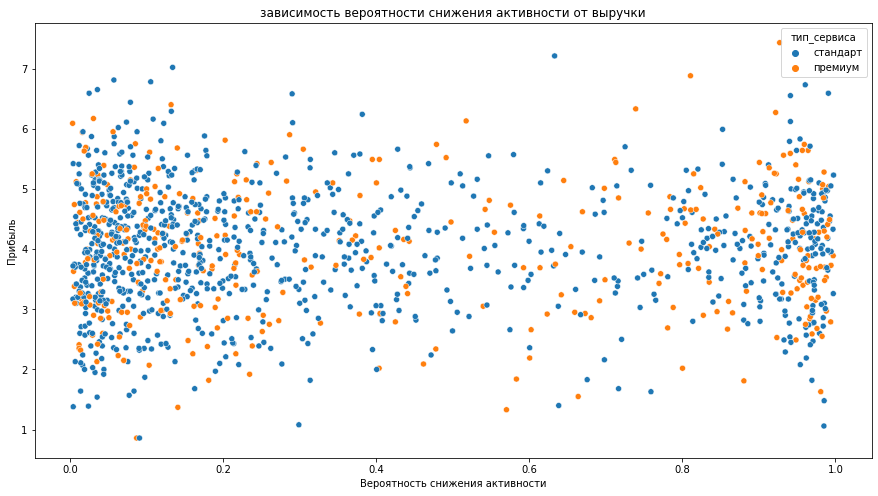

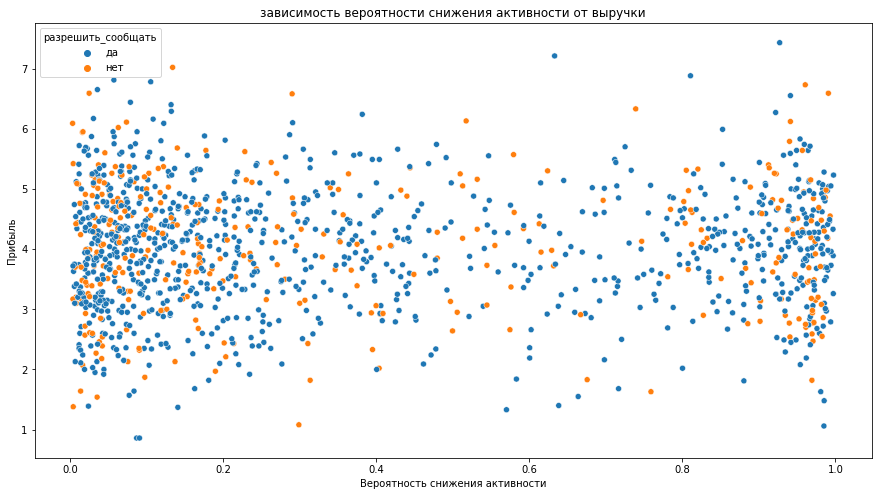

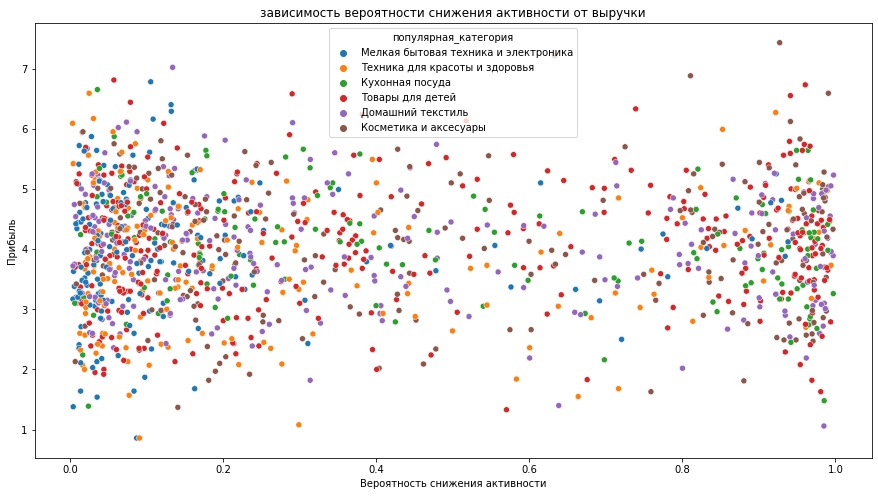

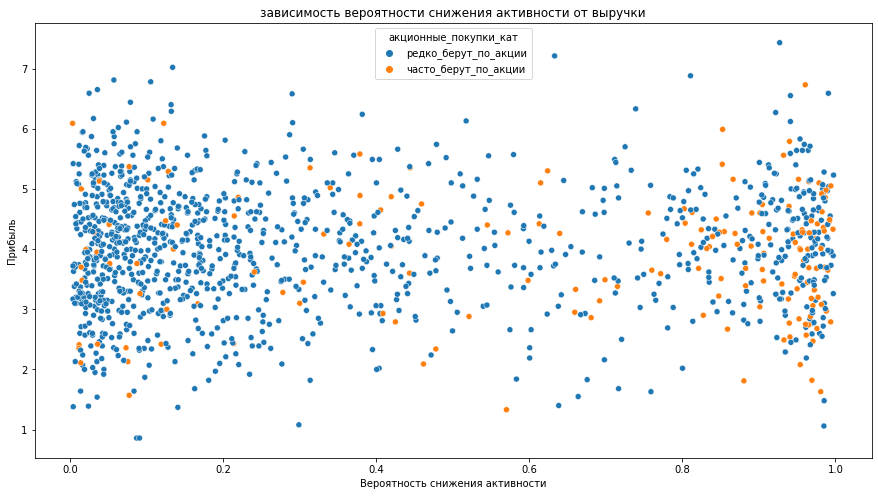

In [96]:
cat_columns = list(df_full.select_dtypes(include='object').columns)
build_scatterplots(cat_columns)

## Выводы по категориальным признакам: 
наиболее информативный график последний - вероятность снижения активности от категориального признака аукционные_покупки_кат. Пользователи, которые чаще всего берут товары по акции, имеют наибольшую вероятность снижения активности

Далее поработаем с количественными признаками

In [97]:
#создадим список количественных признаков
num_data = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
            'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
            'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
            'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
            'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_пред_и_тек_месяц']

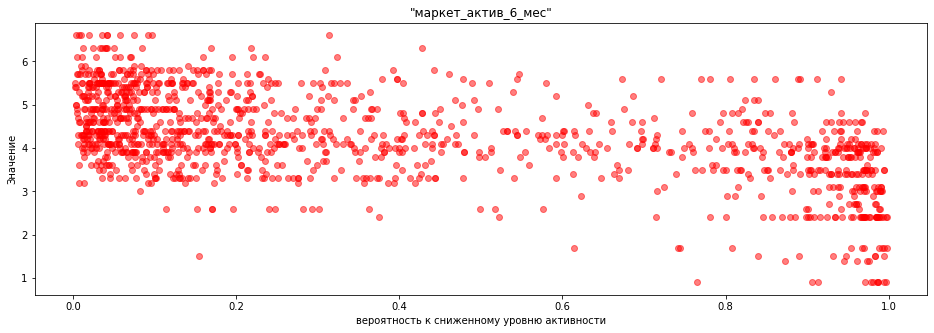

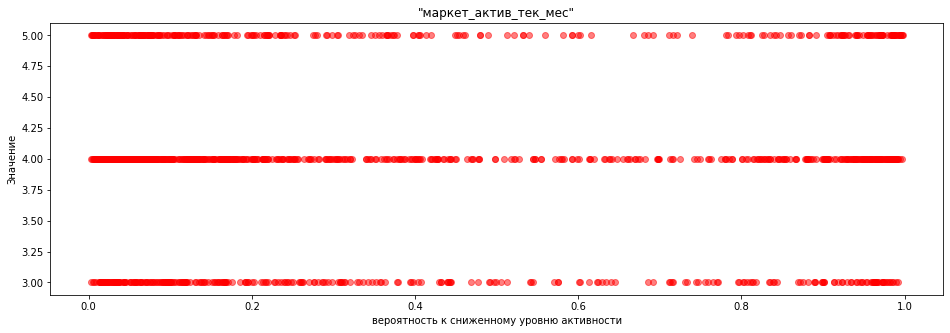

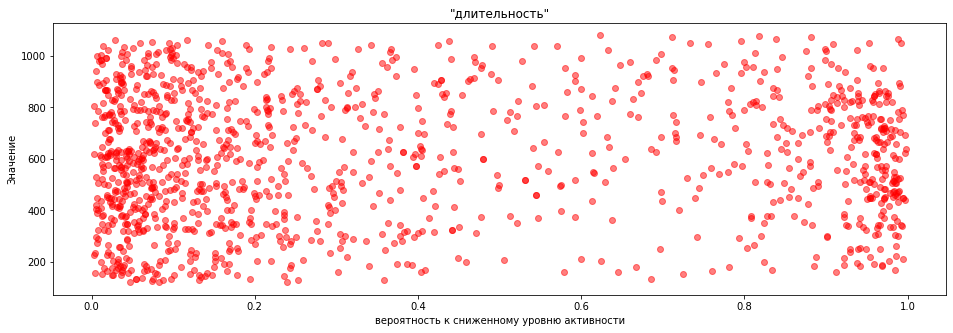

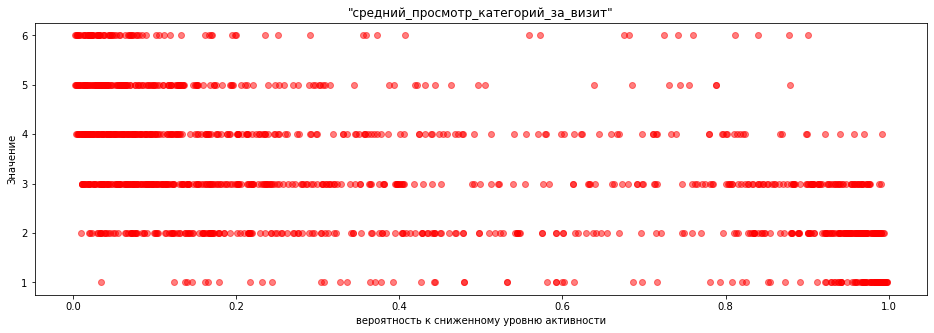

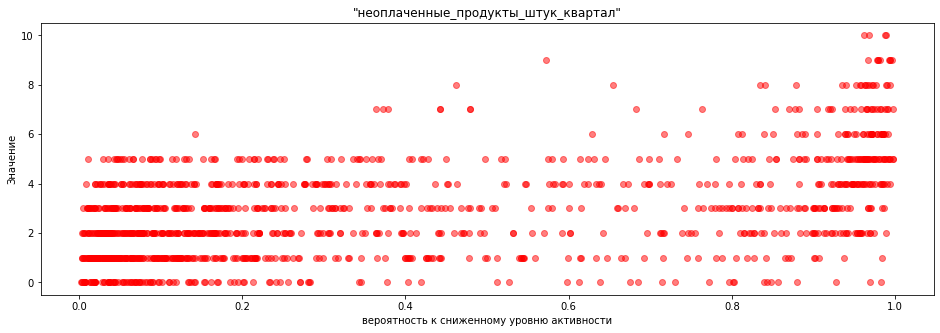

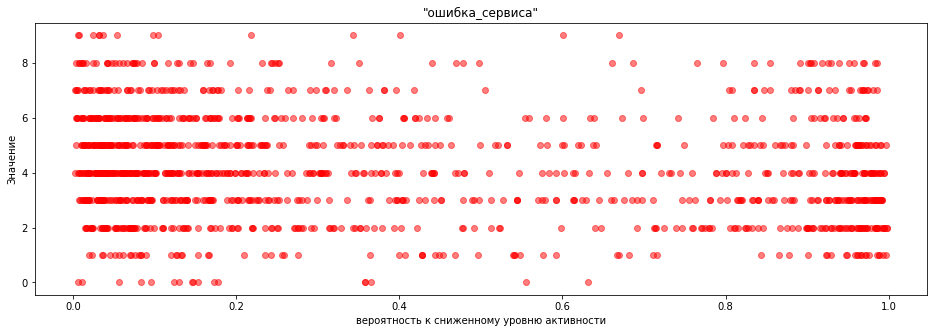

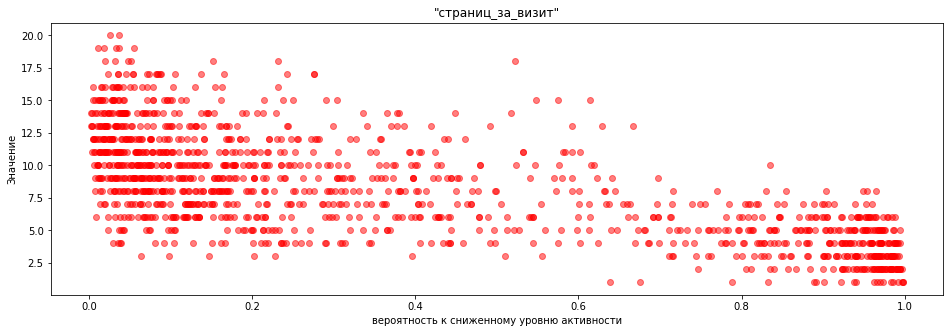

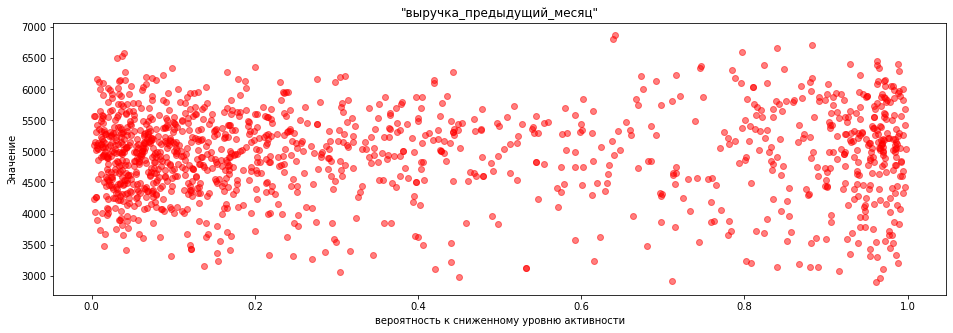

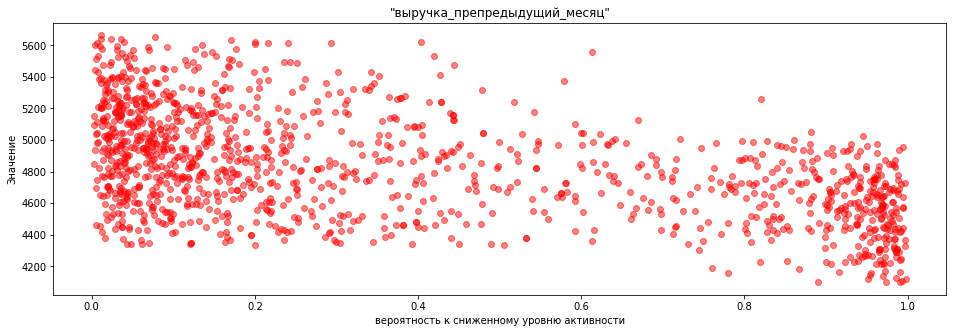

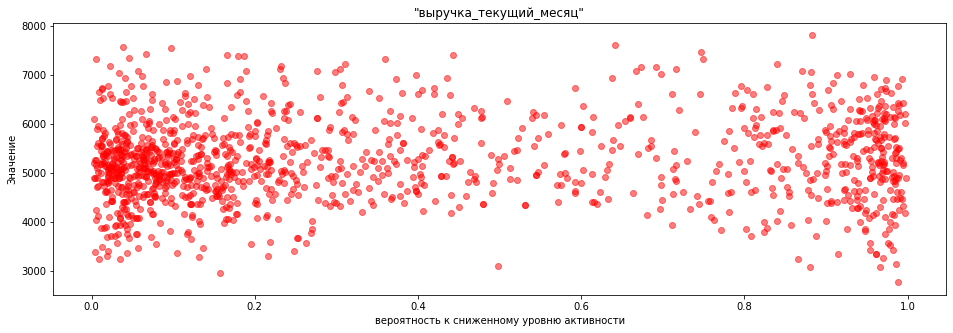

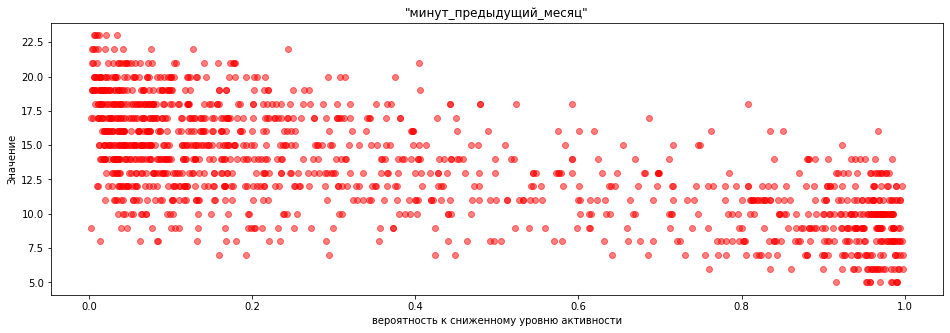

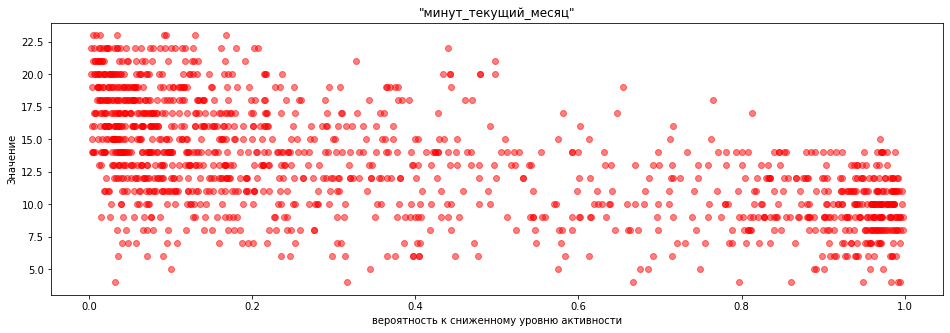

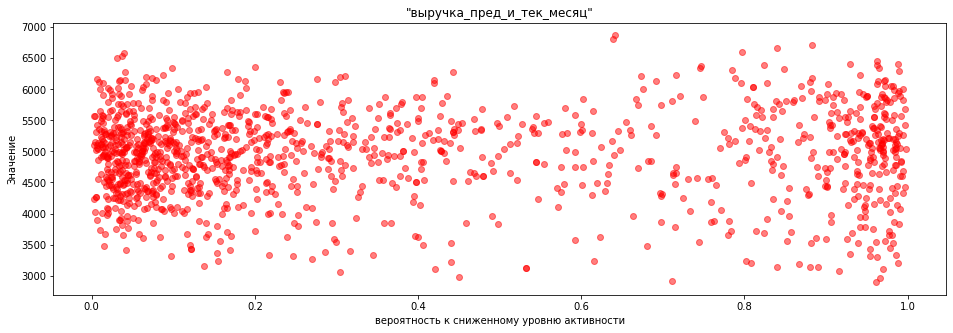

In [98]:
#построим графики распределения числовых признаков в зависимости от вероятности к их сниженному уровню активности
for name in num_data:
    plt.figure(figsize=(16, 5))
    plt.title(f'"{name}"')
    plt.xlabel('вероятность к сниженному уровню активности')
    plt.ylabel(f'Значение')
    plt.scatter(x=df_full['вероятность_снижения'], 
                y=df_full[name],
                alpha=0.5,
               c='Red')

## Выводы по количественным признакам:
Покупателей можно сегментировать следующим образом:
Покупатели со сниженной активностью имеют следующие значения признака:
1. маркет_актив_6_мес менее 3
2. средний_просмотр_категорий_за_визит менее 4
3. длительность практически не зависит от вероятности снижения активности
4. средний просмотр категорий за визит менее 4
5. маркет_автив_тек_мес менее 4
6. средний просмотр категорий за визит менее 4
7. чем больше значение неоплаченные_продукты_штук_квартал, тем больше вероятность снижения активности (более 4)
8. от ошибок сервиса значение не сильно зависит
9. страниц за визит менее 8
10. выручка за препред месяц менее 5000
11. минут предыдущий месяц менее 13
12. минут тек месяц менее 15

необходимо отобрать пользователей со значениями вероятность снижения активности >0.7 и со значением категориального признака "акционные покупки кат равным часто берут по акции

In [99]:
df_full['сегмент'] = df_full\
.apply( lambda row: 'Исследуемый_сегмент' \
        if row['вероятность_снижения'] > 0.7 and row['акционные_покупки_кат']=='часто_берут_по_акции' \
        else 'Остальные пользователи' \
      , axis=1)

In [100]:
#выберем наш исследуемый сегмент
df_full_segment = df_full.query('сегмент == "Исследуемый_сегмент"')

array(['Косметика и аксесуары', 'Товары для детей', 'Кухонная посуда',
       'Домашний текстиль', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

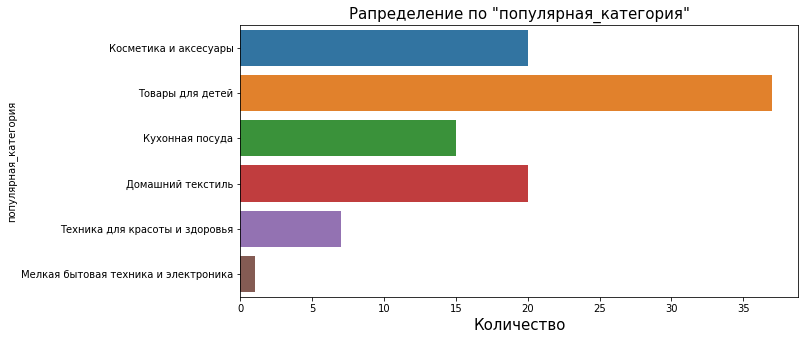

In [101]:
#посмотрим распределение по популярным категориям исследуемого сегмента
categoral_unique(df_full_segment, 'популярная_категория')

Чаще всего, наша исследуемая группа берет товары для детей, далее домашний текстиль и косметика

array(['стандарт', 'премиум'], dtype=object)

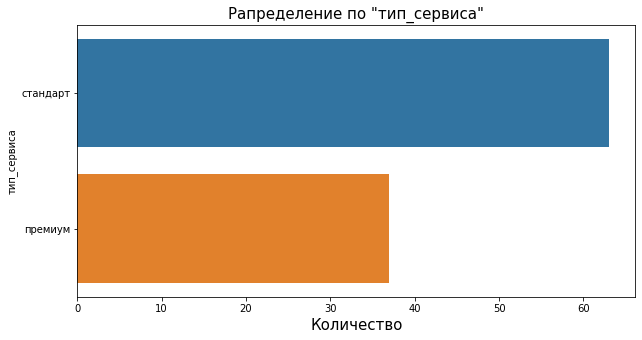

In [102]:
categoral_unique(df_full_segment, 'тип_сервиса')

Исследуемая группа использует в основном не использует премиум, однако тех, кто купил подписку достаточно много

Построим гистограммы распределения исследуемого сегмента и остальных пользователей

In [103]:
#зададим функцию
def histogram(df, col, target):
    plt.figure(figsize=(8,6))
    plot = sns.histplot(df, bins=20, kde=True, hue=target, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)    

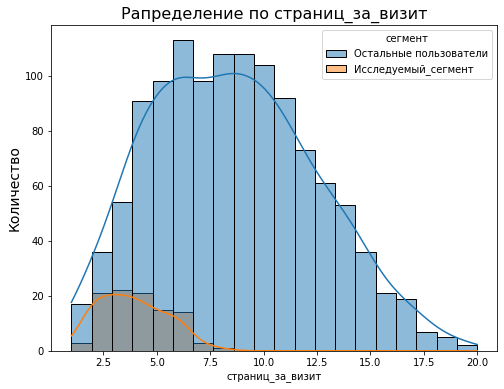

In [104]:
histogram(df_full, 'страниц_за_визит', 'сегмент')

Исследуемый сегмент меньше посещает страниц

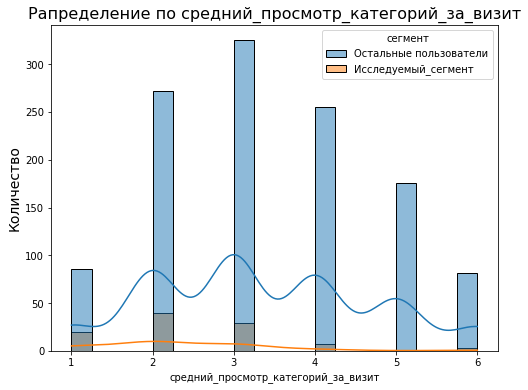

In [105]:
histogram(df_full, 'средний_просмотр_категорий_за_визит', 'сегмент')

Как правило, исследуемый сегмент просматривает 1-2 категории и делает заказ

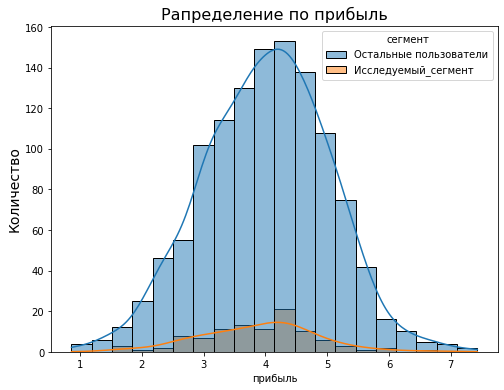

In [106]:
histogram(df_full, 'прибыль', 'сегмент')

исследуемый сегмент приносит меньше прибыли

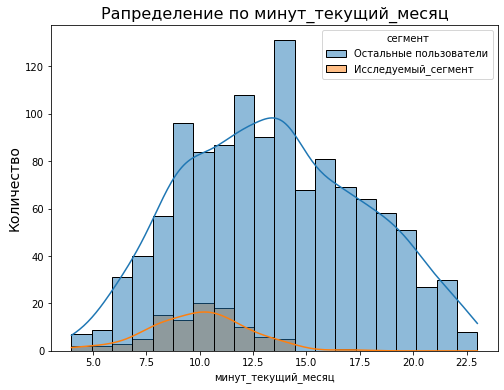

In [107]:
histogram(df_full, 'минут_текущий_месяц', 'сегмент')

Исследуемый сегмент мало времени проводит на маркетплейсе

### Выводы: 
Из отобранной группы покупателей со сниженной покупательской активностью, которые в основном берут товары по акции можно сделать вывод о том, что они чаще всего берут товары для детей, другие категории просматривают редко, просматривают мало страниц, мало времени проводят на маркетплейсе.
Что сделать для увеличения выручки? Из анализа работы мы видим, что рассылки работают слабо, пользователи с низкой покупательской активностью, получается, заходят на маркетплейс за определенным товаром и заказывают его, мало времени проводя на сайте и мало листая товары. Для увеличения выручки, я бы предложил разместить самые популярные товары на главной странице, а не пытаться "заспамить" эту группу рассылками. Думаю нет причин бороться за то, чтобы пользователи дольше оставались на маркетплейса, а сразу предлагать им нужный для заказа товар.

Выводы: Из отобранной группы покупателей со сниженной покупательской активностью, которые берут "товары для детей" можно сделать вывод о том, что они практически всегда берут товары по акции, другие категории просматривают редко, просматривают мало страниц, мало времени проводят на маркетплейсе.
Что сделать для увеличения выручки? Из анализа работы мы видим, что рассылки работают слабо, пользователи с низкой покупательской активностью, получается, заходят на маркетплейс за определенным товаром и заказывают его, мало времени проводя на сайте и мало листая товары. Для увеличения выручки, я бы предложил разместить самые популярные товары на главной странице, а не пытаться "заспамить" эту группу рассылками. Думаю нет причин бороться за то, чтобы пользователи дольше оставались на маркетплейса, а сразу предлагать им нужный для заказа товар.

## Шаг 9. Общий вывод

# В данном проекте была поставлена следующая задача: 
разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Шаг 1. Загрузка данных и изучение общей информации: 
В файле money.csv разделителем была точка с запятой В таблицах отсутствуют пропуски. Все типы данных соответствуют нужным.
## Шаг 2. Предобработка данных: 
Переимновали столбцы согласно правилам хорошего стиля, избавились от пробелов, заменив их на нижнее подчеркивание и привели все столбцы к нижнему регистру
Проверили все датафреймы на явные дубликаты, их не оказалось.
## Шаг 3. Исследовательский анализ данных: 
Построили гистограммы распределения для всех признаков. 
Провели исследовательский анализ данных для каждой таблицы.
Отбросили явно аномальные значения
Исправили опечатки в данных
Оставили пользователей, которые совершали покупки последние 3 календарных месяца.
## Шаг 4. Объединение таблиц: 
объединили таблицы market_file, market_money, market_time в одну
## Шаг 5. Корреляционный анализ: 
провели корреляционный анализ
наблюдалась сильная корреляция между признаками выручка_текущий_месяц и выручка_предыдущий_месяц (0.83)
наблюдалась мультиколлинеарность у признаков выручка_текущий_месяц и выручка_предыдущий_месяц, избавились от нее, объединив эти две таблицы в одну
## Шаг 6. Использование пайплайнов: 
Выявили лучшую модель. Лучшие результаты показала LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'
Метрика лучшей модели на тренировочной выборке: 0.89
Метрика ROC-AUC на тестовой выборке: 0.91
Метрика F1-score на тестовой выборке: 0.86
Модель показала себя очень хорошо, значения высокие
## Шаг 7. Анализ важности признаков: 
Самые важные признаки для модели это мелкая бытовая техника и электроника, средний просмотр категорий за визит, страниц за визит, минут предыдущий месяц, неоплаченные продукты штук квартал. По этим признаком можно разбить покупателей по сегментам. Малозначимыми признаками для модели можно назвать выручку пред и тек месяц (которые мы объединили ранее), тип сервиса, разрешить сообщать. При моделировании и принятии бизнес-решений, необходимо сделать так, чтобы пользователь больше времени проводил на маркетплейсе. Странным выглядит только присутствие на первом месте мелкой бытовой техники и электроники
## Шаг 8. Сегментация покупателей: 
Из отобранной группы покупателей со сниженной покупательской активностью, которые берут "товары для детей" можно сделать вывод о том, что они практически всегда берут товары по акции, другие категории просматривают редко, просматривают мало страниц, мало времени проводят на маркетплейсе. Что сделать для увеличения выручки? Из анализа работы мы видим, что рассылки работают слабо, пользователи с низкой покупательской активностью, получается, заходят на маркетплейс за определенным товаром и заказывают его, мало времени проводя на сайте и мало листая товары. Для увеличения выручки, я бы предложил разместить самые популярные товары на главной странице, а не пытаться "заспамить" эту группу рассылками. Думаю нет причин бороться за то, чтобы пользователи дольше оставались на маркетплейса, а сразу предлагать им нужный для заказа товар.